In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe() # 컬럼별 요약 통계

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr() # 상관관계

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

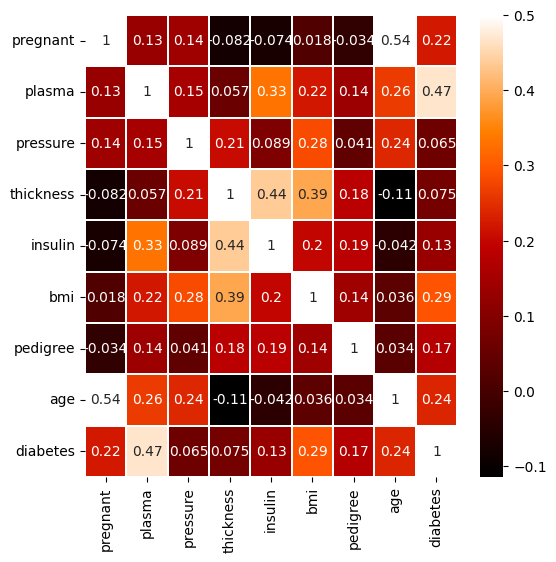

In [6]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(6, 6))

sns.heatmap(df.corr(), vmax=0.5, cmap=colormap, annot=True, linewidths=0.1, linecolor='white')

In [ ]:
df['pregnant'] #Series

,pregnant
0,6
1,1
2,8
3,1
4,0
...,...
763,10
764,2
765,5
766,1


In [ ]:
df.pregnant

,pregnant
0,6
1,1
2,8
3,1
4,0
...,...
763,10
764,2
765,5
766,1


In [ ]:
df[['pregnant', 'diabetes']].groupby(by=['pregnant'])

,pregnant,diabetes
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [ ]:
df_pregnant_group = df[['pregnant', 'diabetes']].groupby(by=['pregnant'], as_index=False).mean()

In [ ]:
df_test = df[['pregnant', 'diabetes']].groupby(by=['pregnant'], as_index=False).agg(['count', 'sum', 'mean'])
df_test.head()

pregnant diabetes              
              count sum      mean
0        0      111  38  0.342342
1        1      135  29  0.214815
2        2      103  19  0.184466
3        3       75  27  0.360000
4        4       68  23  0.338235

In [15]:
df_info = pd.DataFrame()
df_info

""


In [9]:
df_group = df[['pregnant', 'diabetes']].groupby('pregnant', as_index=False)
df_group

In [16]:
df_info['pregnant'] = df_group.count()['pregnant']
df_info.head()

,pregnant
0,0
1,1
2,2
3,3
4,4


In [17]:
df_info['count'] = df_group.count()['diabetes']
df_info.head()

,pregnant,count
0,0,111
1,1,135
2,2,103
3,3,75
4,4,68
5,5,57
6,6,50
7,7,45
8,8,38
9,9,28


In [18]:
df_info['sum'] = df_group.sum()['diabetes']
df_info.head()

,pregnant,count,sum
0,0,111,38
1,1,135,29
2,2,103,19
3,3,75,27
4,4,68,23


In [19]:
df_info['mean'] = df_group.mean()['diabetes']
df_info.head()

,pregnant,count,sum,mean
0,0,111,38,0.342342
1,1,135,29,0.214815
2,2,103,19,0.184466
3,3,75,27,0.360000
4,4,68,23,0.338235


In [21]:
df_info = df_info.sort_values('mean',ascending=False)
df_info.head()

,pregnant,count,sum,mean
16,17,1,1,1.000000
15,15,1,1,1.000000
14,14,2,2,1.000000
9,9,28,18,0.642857
11,11,11,7,0.636364


In [22]:
df_info.index

Index([16, 15, 14, 9, 11, 8, 7, 13, 12, 10, 5, 3, 0, 4, 6, 1, 2], dtype='int64')

In [23]:
df_info.index = range(17)
df_info.head()

,pregnant,count,sum,mean
0,17,1,1,1.000000
1,15,1,1,1.000000
2,14,2,2,1.000000
3,9,28,18,0.642857
4,11,11,7,0.636364


In [25]:
print(df.plasma)

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: plasma, Length: 768, dtype: int64


In [27]:
print(df.diabetes==0)

0      False
1       True
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766    False
767     True
Name: diabetes, Length: 768, dtype: bool


In [28]:
df.plasma[df.diabetes == 0]

,plasma
1,85
3,89
5,116
7,115
10,110
...,...
762,89
763,101
764,122
765,121


In [29]:
df.plasma[df.diabetes == 1]

,plasma
0,148
2,183
4,137
6,78
8,197
...,...
755,128
757,123
759,190
761,170


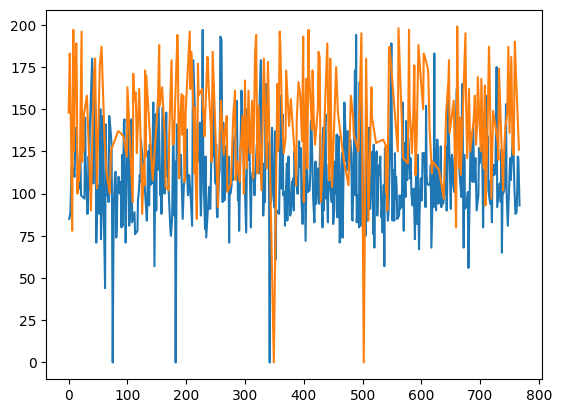

In [31]:
plt.plot(df.plasma[df.diabetes==0])
plt.plot(df.plasma[df.diabetes==1])
plt.show()

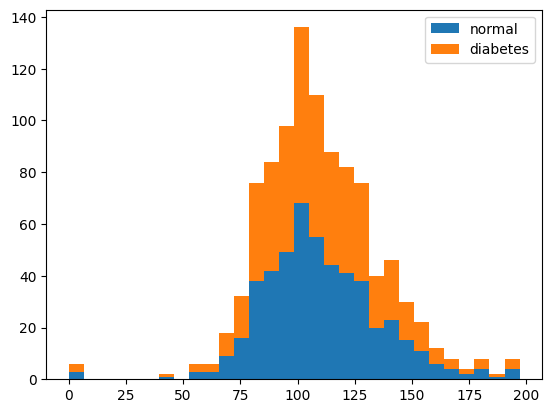

In [35]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==0]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()

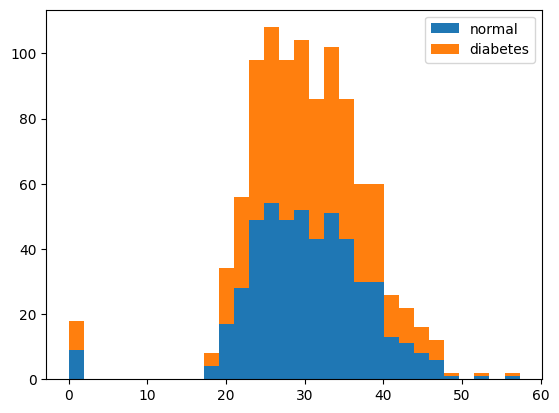

In [36]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==0]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()